# Lecture 24: Demonstration
## Application of SVD to Image Compression

In [ ]:
import numpy as np

# the packages below are needed to process/display images, etc.
from matplotlib import pyplot as plt
from PIL import Image
from io import BytesIO
import requests
% matplotlib inline

1480 2048


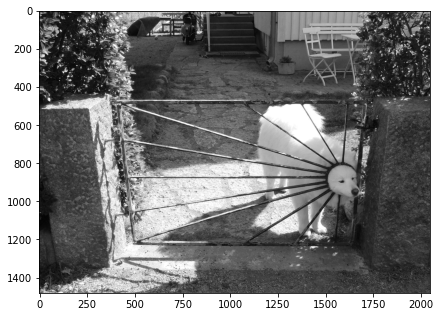

In [ ]:
# STEP 1: GET ORIGINAL IMAGE/DATA

# Specify the url of the original image
# for example:
#imageurl = "https://upload.wikimedia.org/wikipedia/commons/thumb/d/db/Margaret_Hamilton_-_restoration.jpg/423px-Margaret_Hamilton_-_restoration.jpg"
#imageurl = "https://i.redd.it/8a1zq6cdfwu21.jpg"
imageurl = "https://i.redd.it/mp80hm7ye1v21.jpg"

# Convert image into a matrix called A_original
response = requests.get(imageurl)
img_original = Image.open(BytesIO(response.content))

#A_original = np.matrix(np.asarray(img_original)) # use this if original image is in grayscale
A_original = np.matrix(np.asarray(img_original)[:, :, 0]) # use this if original image is in color

# Check the size of the matrix 
#   (which is also the resolution of the original image)
(m, n) = A_original.shape
print(m, n)

# Display the original image:
fig = plt.figure(figsize = (7, 7))
plt.imshow(A_original, cmap='gray')
plt.show()
#img_original

In [ ]:
print(A_original)

[[102  57  52 ...  65  53  50]
 [ 88  58  58 ...  45  44  54]
 [ 70  42  36 ...  36  37  49]
 ...
 [168 179 198 ...  68  78  69]
 [146 158 185 ...  63  65  50]
 [115 135 177 ...  55  63  62]]


In [ ]:
# STEP 2: SINGULAR VALUE DECOMPOSITION

# Use python to compute the SVD of A_original
#  the outputs are:
#   U : an m x m matrix
#   sigma_vector: a vector of singular values
#   Vt : an n x n matrix (V transpose)
U, sigma_vector, Vt = np.linalg.svd(A_original, full_matrices = True)



# Clean up the matrices to produce U, Sigma, V, where 
#  Sigma is an mxn, "diagonal"; U is mxm, orthogonal; V is nxn, orthogonal
Sigma = np.matrix( np.zeros([m, n]) )
r = len(sigma_vector)
Sigma[0:r, 0:r ] = np.diag( sigma_vector )
V = np.matrix(Vt).T
U = np.matrix(U)

# Check the sizes of the matrices

print(r)
print(U.shape)
print(Sigma.shape)
print(V.shape)

1480
(1480, 1480)
(1480, 2048)
(2048, 2048)


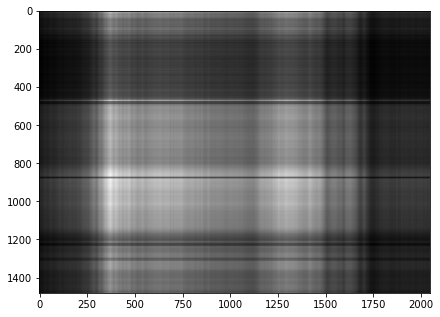

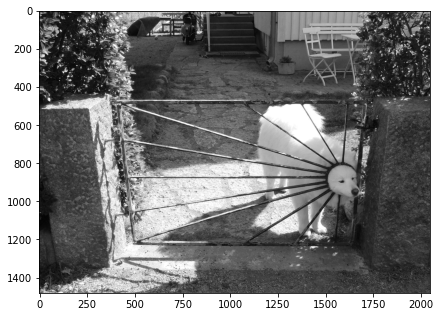

In [ ]:
# STEP 3: IMAGE COMPRESSION

# Choose to keep the first k singular values

k =  1  # try different values of k here

sigma_k = sigma_vector[0:k]
Sigma_k = np.matrix( np.zeros( [m, n] ) )
Sigma_k[ 0:k, 0:k ] = np.diag( sigma_k )



# Use only the largest k singular values to approximate A_original:
A_compressed = U * Sigma_k * V.T


# Plot the compressed image
fig = plt.figure(figsize = (7, 7))
plt.imshow(A_compressed, cmap='gray')
plt.show()

# Compare to original image
fig = plt.figure(figsize = (7, 7))
plt.imshow(A_original, cmap='gray')
plt.show()